# Testing and regularization

In [14]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/polynomial_regression

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 259, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 259 (delta 2), reused 5 (delta 1), pack-reused 252
Receiving objects: 100% (259/259), 41.18 MiB | 22.86 MiB/s, done.
Resolving deltas: 100% (125/125), done.
/content/machine_learning_1/polynomial_regression/machine_learning_1/polynomial_regression


In [15]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)

## Defining our dataset

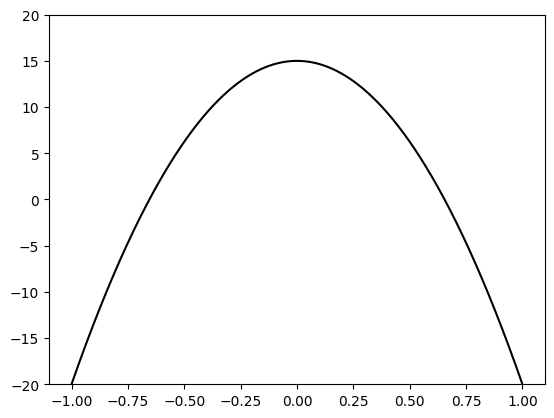

In [16]:
# Our original polynomial is -35x^2+x+15
coefs = [15,0,-35]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-1, 1, 1000)
    plt.ylim(-20,20)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [17]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-1,1)
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)
X=np.array(X)
Y=np.array(Y)

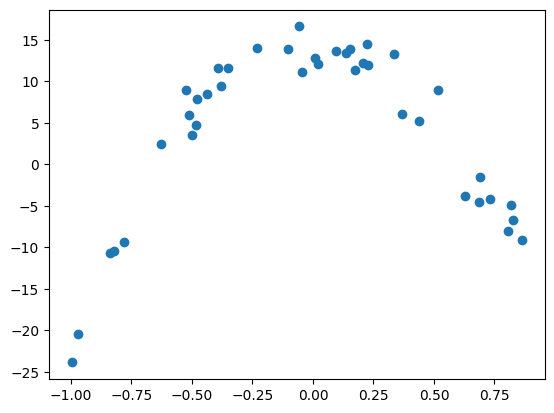

In [18]:
plt.scatter(X, Y)
#draw_polynomial(coefs)

## Training a polynomial regression model

In [19]:
for datasample in zip(X,Y):
    print(datasample)

(0.6888437030500962, -1.503313676546703)
(-0.4821664994140733, 4.776223391096098)
(0.02254944273721704, 12.087957039273702)
(-0.3933745478421451, 11.552655381342872)
(-0.04680609169528838, 11.13939451533042)
(0.009373711634780513, 12.810729063756577)
(-0.43632431120059234, 8.437955069843738)
(-0.4989873172751189, 3.511211911084044)
(0.8194925119364802, -4.879955934160179)
(0.8043319008791654, -8.0368585173616)
(-0.37970486136133474, 9.412786903432224)
(0.36796786383088254, 6.014161594638752)
(-0.055714569094573285, 16.612588226930765)
(0.2217739468876032, 14.540743210654112)
(0.8260221064757964, -6.653701461777612)
(0.7306198555432801, -4.157483878852887)
(-0.47901537921608117, 7.82406268607659)
(-0.9719165996719621, -20.435354443047032)
(0.43940937280790826, 5.238271435416371)
(0.3363064024637017, 13.258006206843095)
(-0.9977143613711434, -23.858802994572372)
(-0.512178246225736, 5.980815567451724)
(-0.3495912745052199, 11.6168873009973)
(0.13502148124134372, 13.415138003037914)
(-0.5

### Adding columns to our dataset corresponding to $x^2, x^3, \ldots, x^{200}$

In [20]:
from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    ## TODO ##
    #use sklearn (PolynomialFeatures method)
    poly = PolynomialFeatures(200, include_bias = False)
    X = poly.fit_transform(X.reshape(-1, 1))
    return X
X_poly=addPoly(X,200)

In [21]:
print(X_poly.shape)
print(X_poly[0,:])

(40, 200)
[6.88843703e-01 4.74505647e-01 3.26860227e-01 2.25155609e-01
 1.55097024e-01 1.06837608e-01 7.35944136e-02 5.06950484e-02
 3.49209649e-02 2.40550867e-02 1.65701950e-02 1.14142745e-02
 7.86265112e-03 5.41613771e-03 3.73087236e-03 2.56998793e-03
 1.77032000e-03 1.21947379e-03 8.40026839e-04 5.78647198e-04
 3.98597479e-04 2.74571363e-04 1.89136755e-04 1.30285662e-04
 8.97464582e-05 6.18212826e-05 4.25852012e-05 2.93345477e-05
 2.02069185e-05 1.39194085e-05 9.58829693e-06 6.60483796e-06
 4.54970104e-06 3.13403291e-06 2.15885884e-06 1.48711632e-06
 1.02439071e-06 7.05645090e-07 4.86079177e-07 3.34832580e-07
 2.30647314e-07 1.58879950e-07 1.09443453e-07 7.53894335e-08
 5.19315366e-08 3.57727120e-08 2.46418074e-08 1.69743538e-08
 1.16926768e-08 8.05442676e-09 5.54824115e-09 3.82187098e-09
 2.63267176e-09 1.81349936e-09 1.24921762e-09 8.60515689e-10
 5.92760814e-10 4.08319554e-10 2.81268354e-10 1.93749934e-10
 1.33463422e-10 9.19354380e-11 6.33291475e-11 4.36238845e-11
 3.00500381e-1

## Splitting data into training and testing

In [24]:
from sklearn.model_selection import train_test_split
## TODO ##
# use sklearn (train_test_split) to split data to 80% training 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.2)

In [25]:
from sklearn.metrics import mean_squared_error
def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict=model.predict(X_train)
    ytest_predict=model.predict(X_test)
    train_error=np.sqrt(mean_squared_error(y_train,ytrain_predict))
    test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)
    plt.scatter(X_train[:,0], y_train, marker='o')
    plt.scatter(X_test[:,0], y_test, marker='^')
    draw_polynomial(coefs)
    plt.show()
    print("Polynomial coefficients")
    print(coefs)

## Training a polynomial regression model with no regularization

In [27]:
from sklearn.linear_model import LinearRegression
## TODO ##
# use sklearn linear regression to fit the data
reg = LinearRegression()
model_no_reg = reg.fit(X_train,y_train)

Training error (rmse): 0.24533141445654777
Testing error (rmse): 44411125352730.15


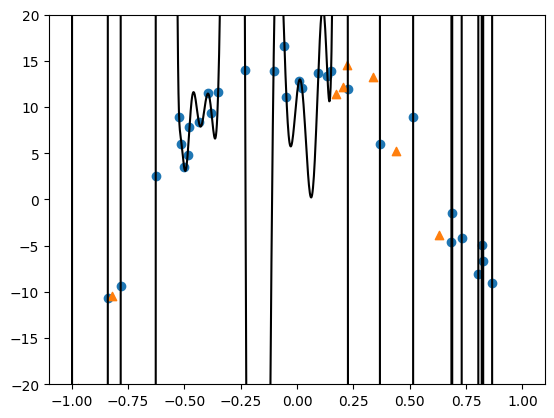

Polynomial coefficients
[11.375072766195418, 227.5302389012515, -5667.057582841448, -204340.34461292645, 2198523.952788243, 33653480.847758316, -230607005.54186618, -2193159745.0210547, 8643470126.040281, 74857348736.26593, -121474772386.38164, -1362357472412.7637, 229348755371.81445, 13079322725043.24, 8149566816403.355, -68220706979452.91, -72620989670901.94, 196166583613570.62, 256556264912250.44, -295822408452172.0, -393957787020957.9, 182441807861358.72, 97094535116399.4, 24915756748810.27, 313111661721630.0, -54762135809003.01, -17590572868842.24, 12199282224929.459, -253511343467139.56, 23963415906248.02, -179066530393745.47, -21622713362449.98, 24842393478938.05, -50025303958764.75, 166463357878164.97, -36333982905849.945, 189956315323482.72, -2559376962474.3037, 124929263295857.52, 25312781200555.234, 26642363325404.816, 36556033890557.07, -60435139872405.87, 32705677979656.89, -117764121750831.44, 25380285215569.395, -143852211781265.5, 17092769511491.475, -141712030527186.25

In [28]:
display_results(model_no_reg)

## Training a polynomial regression model with L1 regularization

In [29]:
from sklearn import linear_model
## TODO ##
# use sklearn Lasso (linear regression with L1 Norm) to fit the data
lasso = linear_model.Lasso(alpha=0.1)
model_L1_reg = lasso.fit(X_train,y_train)

Training error (rmse): 1.9646231406002987
Testing error (rmse): 2.5910079792701866


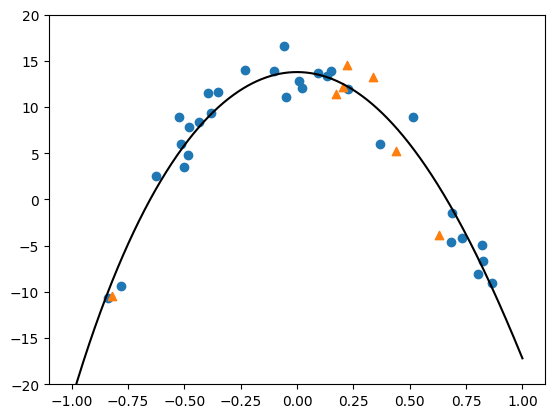

Polynomial coefficients
[13.788610725067292, -0.0, -30.900031729653946, 0.0, -2.3317968179743893, 2.250032040747129, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.

In [30]:
display_results(model_L1_reg)

## Training a polynomial regression model with L2 regularization

In [31]:
from sklearn import linear_model
## TODO ##
# use sklearn Ridge (linear regression with L2 Norm) to fit the data
ridge = linear_model.Ridge(alpha=0.5)
model_L2_reg = ridge.fit(X_train,y_train)

Training error (rmse): 2.3485469317450036
Testing error (rmse): 3.7645854766738966


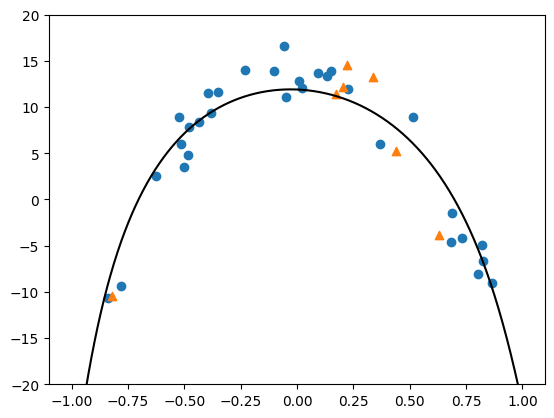

Polynomial coefficients
[11.90090739151189, -1.0119552641099823, -17.666360297489625, 0.7774712065192171, -9.792262563379175, 1.0993618007857855, -5.368661030552128, 1.0740670868284514, -2.9799701399829206, 0.9096156035681546, -1.664539407871195, 0.7067236278828756, -0.9269437946952584, 0.5177281959027551, -0.5072466743679411, 0.36214031621352016, -0.26558405167844407, 0.24220249102385097, -0.12513738473504213, 0.15317149265754748, -0.04297658040773794, 0.08854943709972507, 0.005257809599489793, 0.04227246971580234, 0.033574271389117866, 0.009399269278666578, 0.05012243056577248, -0.013840034913656901, 0.059689416828782954, -0.030219574919643943, 0.06510884141796952, -0.041738844344446635, 0.0680674282564517, -0.04982193304538632, 0.06957272766766212, -0.0554765212324729, 0.07022734713035522, -0.05941343178957659, 0.07039126205057333, -0.06213363260363916, 0.07027862802437226, -0.06399037458151177, 0.07001587434938406, -0.065233099804855, 0.06967671523218888, -0.06603829173512085, 0.06

In [32]:
display_results(model_L2_reg)

## Viewing the predictions in the testing set

In [33]:
import pandas as pd
from IPython.display import display
predictions={}
predictions ['x']=X_test[:,0]
predictions ['y']=y_test
predictions['No reg'] = model_no_reg.predict(X_test)
predictions['L1 reg'] = model_L1_reg.predict(X_test)
predictions['L2 reg'] = model_L2_reg.predict(X_test)
predictions=pd.DataFrame.from_dict(predictions)
display(predictions)

,x,y,No reg,L1 reg,L2 reg
0,0.175234,11.390800,1.104448e+02,12.837937,11.176077
1,0.206371,12.218877,3.796578e+02,12.469219,10.928751
2,0.336306,13.258006,-5.580512e+04,10.273607,9.463808
3,0.221774,14.540743,1.713709e+02,12.264400,10.792341
4,-0.971917,-20.435354,-1.256136e+14,-19.432265,-25.586730
5,-0.820351,-10.449481,3.493165e+09,-8.898404,-7.612756
6,0.628934,-3.833775,-6.099300e+06,1.422439,2.681813
7,0.439409,5.238271,8.831166e+05,7.772343,7.724891


### Real Example (Predict fuel efficiency)

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [35]:
#### Get data

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

dataset = raw_dataset.copy()

#### Clean data

dataset.isna().sum()

dataset = dataset.dropna()

dataset.isna().sum()

dataset.head()

dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


In [36]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

#### using 50th order

In [37]:
from sklearn.preprocessing import normalize

X_train=train_dataset[['Horsepower']]
y_train=train_dataset[['MPG']]

X_test=test_dataset[['Horsepower']]
y_test=test_dataset[['MPG']]

from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    poly = PolynomialFeatures(polyDegree,include_bias=False)
    X=poly.fit_transform(X)
    return X
X_trainPoly=normalize(addPoly(X_train,50),axis=0)
X_testPoly=normalize(addPoly(X_test,50),axis=0)

##### no regularization

In [38]:
# no regularization
from sklearn.linear_model import LinearRegression
model_no_reg = LinearRegression()
model_no_reg.fit(X_trainPoly, y_train)
ytest_predict=model_no_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

1289279.7907303446


##### lasso regularization

In [39]:
# lasso regularization
from sklearn import linear_model
model_L1_reg = linear_model.Lasso(alpha=0.5)
model_L1_reg.fit(X_trainPoly, y_train)
ytest_predict=model_L1_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

8.1098592143875


##### ridge regularization

In [40]:
# ridge regularization
from sklearn import linear_model
model_L2_reg = linear_model.Ridge(alpha=0.5)
model_L2_reg.fit(X_trainPoly, y_train)
ytest_predict=model_L2_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

7.768630332120947
